# I. Algorithm

$ p(x^{(i)}=1)=\hat{y}_i $

$p(x^{(i)}=0)=1-\hat{y}_i$

$=> p(x^{(i)}=1) + p(x^{(i)}=0)=1$

Hàm sigmoid: $\sigma(x)=\frac{1}{1+e^{-x}}$

>$$\hat{y}_i=\sigma(w_0+w_1*x_1^{(i)}+w_2*x_2^{(i)})=\frac{1}{1+e^{-(w_0+w_1*x_1^{(i)}+w_2*x_2^{(i)})}}$$

Loss Funtion (binary_crossentropy): 
>$$L = −(y_i ∗ log(\hat{y}_i) + (1−y_i) ∗ log(1−\hat{y}_i))$$

Loss function trên toàn bộ dữ liệu: 
>$$J=\frac{-1}{N} * \sum{N}{i=1}(y_ilog(\hat{y}_i)+(1-y_i)*log(1-\hat{y}))$$

# II. Python code 

### 1. Import libraries and define Sigmoid funtion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### 2. Load data from .csv file

In [ ]:
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
print(x, '\n', '\n', y)

In [ ]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [ ]:
# Thêm một cột vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)
print(x, '\n', '\n', w)

In [ ]:
numOfIteration = 1000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.01


In [ ]:
print(cost)

### 3. Train model

Hàm sigmoid: $\sigma(x)=\frac{1}{1+e^{-x}}$

>$\hat{y}_i=\sigma(w_0+w_1*x_1^{(i)}+w_2*x_2^{(i)})=\frac{1}{1+e^{-(w_0+w_1*x_1^{(i)}+w_2*x_2^{(i)})}}$
\
>$\hat{y}=\sigma{(X * W)}$

Loss funtion:
>$J=-\frac{1}{N}*sum(y⊗\log{(\hat{y})}+(1-y)⊗\log{(1-\hat{y})})$

Weight:
>$\frac{dJ}{dw}=\frac{1}{N}*X^T*(\hat{y}-y)$

In [ ]:
for i in range(1, numOfIteration):
    # tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + \
                      np.multiply(1-y, np.log(1-y_predict)))
    
    # np.dot là tích vô hướng còn np.multiply là element-wise multiplication
    
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y) # hoán vị của ma trận x nhân với y_pred - y
    print(cost[i])

In [ ]:
# Vẽ đường phân cách.
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ \
np.log(1/t-1))/w[2]), 'g')
plt.show()


In [ ]:
# Lưu weight dùng numpy.save(), định dạng '.npy'
np.save('weight logistic.npy', w)
# Load weight từ file ''.npy'
w = np.load('weight logistic.npy')


### 4. Logistic Regression using scikit-learn library

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

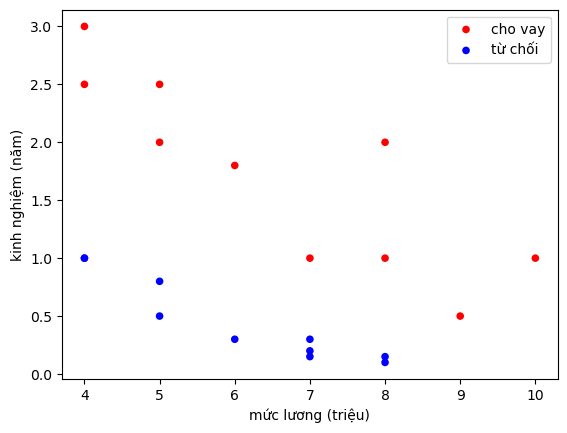

In [12]:
# Logistic Regression dùng thư viện sklearn
from sklearn.linear_model import LogisticRegression
# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
# Tạo mô hình Logistic Regression và train
logreg = LogisticRegression()
logreg.fit(x, y)
# Lưu các biến của mô hình vào mảng
wg = np.zeros( (3, 1) )
wg[0, 0] = logreg.intercept_
wg[1:, 0] = logreg.coef_
# Vẽ đường phân cách
t = 0.5
plt.plot((4, 10),(-(wg[0]+4*[1]+ np.log(1/t-1))/wg[2], \
-(wg[0] + 10*wg[1]+ np.log(1/t-1))/wg[2]), 'g')
plt.show()

In [ ]:
# Lưu các tham số dùng numpy.savez(), đỉnh dạng '.npz'
np.savez('w logistic.npz', a=logreg.intercept_, b=logreg.coef_)

In [ ]:
# Load các tham số dùng numpy.load(), file '.npz'
k = np.load('w logistic.npz')
logreg.intercept_ = k['a']
logreg.coef_ = k['b']